# On Menzerath's law in English - CMU and Gutenberg


In his work, Altmann (1980) proposed a mathematical formulation to Menzerath's observations and he also fitted the model using the data from Roberts (1965) (made from 15.465.010 tokens).

- Altmann, Gabriel. 1980. Prolegomena to Menzerath’s law. Glottometrika 2. 1–10.
- Roberts, Aaron Hood. 1965. A statistical linguistic analysis of american english Janua linguarum: Series practica. Mouton.

We propose here to revisit Menzerath's law and Altmann's formulation, using as data source: 1) Ulysses by James Joice (which was used by G.K. Zipf in his studies) and 2) the top 100 books on Gutenberg's database (notice that the list of top 100 might change in time).

This sources are text only and they will be used to get the number of occurrence of words. In order to get the syllabification of words and their phonetic transcription we will use the online dictionary [dictionary.com](http://www.dictionary.com) and [the CMU Pronouncing Dictionary](http://www.speech.cs.cmu.edu/cgi-bin/cmudict).

In [11]:
cd /tmp
mkdir top100
cd top100
wget -q https://raw.githubusercontent.com/leolca/clscripts/master/downloadGutenbergTop100in30days.sh
chmod +x downloadGutenbergTop100in30days.sh
./downloadGutenbergTop100in30days.sh
ls

trying to download from http://www.gutenberg.org/files/84/84-0.txt... 1/10
done
Success!
trying to download from http://www.gutenberg.org/files/1342/1342-0.txt... 1/10
done
Success!
trying to download from http://www.gutenberg.org/files/1080/1080-0.txt... 1/10
done
Success!
trying to download from http://www.gutenberg.org/files/43/43-0.txt... 1/10
done
Success!
trying to download from http://www.gutenberg.org/files/46/46-0.txt... 1/10
done
Success!
trying to download from http://www.gutenberg.org/files/2701/2701-0.txt... 1/10
done
Success!
trying to download from http://www.gutenberg.org/files/25525/25525-0.txt... 1/10
done
Success!
http://www.gutenberg.org/files/16328/16328-0.txt not found
trying to download from http://www.gutenberg.org/files/16328/16328.txt... 1/10
done
iconv: illegal input sequence at position 34563
Success!
trying to download from http://www.gutenberg.org/files/98/98-0.txt... 1/10
done
Success!
http://www.gutenberg.org/files/2542/2542-0.txt not found
trying to dow

done
Success!
http://www.gutenberg.org/files/55/55-0.txt not found
trying to download from http://www.gutenberg.org/files/55/55.txt... 1/10
done
Success!
http://www.gutenberg.org/files/3296/3296-0.txt not found
trying to download from http://www.gutenberg.org/files/3296/3296.txt... 1/10
done
Success!
http://www.gutenberg.org/files/161/161-0.txt not found
trying to download from http://www.gutenberg.org/files/161/161.txt... 1/10
done
Success!
trying to download from http://www.gutenberg.org/files/57490/57490-0.txt... 1/10
done
Success!
trying to download from http://www.gutenberg.org/files/58585/58585-0.txt... 1/10
done
Success!
http://www.gutenberg.org/files/42324/42324-0.txt not found
trying to download from http://www.gutenberg.org/files/42324/42324.txt... 1/10
done
Success!
http://www.gutenberg.org/files/7370/7370-0.txt not found
trying to download from http://www.gutenberg.org/files/7370/7370.txt... 1/10
done
Success!
http://www.gutenberg.org/files/4363/4363-0.txt not found
trying 

In [14]:
# concatenate all files
cat /tmp/top100/*.txt > /tmp/gutenberg100.txt
# dowdload script to count occurrence of words in text file
wget -q https://raw.githubusercontent.com/leolca/clscripts/master/wordcounttfl.sh -O /tmp/wordcounttfl.sh
chmod +x /tmp/wordcounttfl.sh
# count occurrence of words in /tmp/gutenberg100.txt
/tmp/wordcounttfl.sh -i /tmp/gutenberg100.txt -o /tmp/gutenberg100.counts
# show some results
head /tmp/gutenberg100.counts

f	type
600315	the
373909	and
321607	of
281486	to
217713	a
175272	in
157222	i
136153	that
135774	he


In [1]:
wget -q http://svn.code.sf.net/p/cmusphinx/code/trunk/cmudict/cmudict.0.7a -O /tmp/cmudict
file /tmp/cmudict

/tmp/cmudict: ASCII text


The first lines of CMU dictionary has many comments (lines stating with ;;) and pronunciation of punctuation signs. We will remove them by removing the first 126 lines.

Words are written in upercase and they might have a dash (-) and apostophre ('). We will use ```sed``` to remove all remaining characters (but white space). 

Words are listed in the first column, so we use ```awk``` to print just this column. Some words have multiple pronounciation for example: 

again /əˈgɛn, əˈgeɪn/

AGAIN  AH0 G EH1 N

AGAIN(1)  AH0 G EY1 N

where we see both representations in CMU dictionary. To list the words, we just need one of them, so we use ```uniq```. 


In [2]:
tail -n +127 /tmp/cmudict | sed "s/[^A-Z\-\'\ ]//g" | 
    awk '{print tolower($1)}' | 
    sort | uniq > /tmp/cmuwordlist

Now we're gonna use the script ```getsyllabification.sh``` from [clscripts](https://github.com/leolca/clscripts) to retrieve the word syllabification from online dictionary.

We present bellow 10 random examples taken from our list of words.

In [7]:
wget -q https://raw.githubusercontent.com/leolca/clscripts/master/getsyllabification.sh -O /tmp/getsyllabification.sh
chmod +x /tmp/getsyllabification.sh
shuf -n 10 /tmp/cmuwordlist | /tmp/getsyllabification.sh

pacholski
forbis
queens
fulks
bandow's
hawn
eth-i-cal
hotz
in-ter-link
in-ex-pe-ri-ence


And now for each word in the list we're going to retrieve its syllafication. The file ```cmuwordsyllist``` will store the result: word and word syllabification.

In [ ]:
while read word; do
  syl=$(echo "$word" | /tmp/getsyllabification.sh)
  echo -e "$word\t$syl" >> /tmp/cmuwordsyllist
done </tmp/cmuwordlist

In [11]:
shuf -n 10 /tmp/cmuwordsyllist

abandoned	abandoned
abilene	abilene
abundance	a-bun-dance
abood	abood
aborn	aborn
abbie	abbie
abott	abott
abandonments	a-ban-don
abuses	a-buse
academic	ac-a-dem-ic


It is difficul to determine a correct syllabification in all cases. The syllable is not easy to define precisely so there is no 'gold standard' syllabification approach. We have acquired the syllabification of words from an online dictionary, but many words and flexed forms or derived words are not found in online dictionary. In oder cases are found, the syllabification given is for the stem word. An algorithmic approach is able to overcome these missing cases, but it might be not so accurate. Either way, we're gonna use the algorithmic syllabification approach from Kyle Gorman, so we might state comparisions and fill the gaps.

Python module for syllabifying English ARPABET transcriptions <br>
https://github.com/kylebgorman/syllabify <br>
https://github.com/kylebgorman/syllabify/raw/master/manual.pdf

In [ ]:
wget -q https://raw.githubusercontent.com/kylebgorman/syllabify/master/syllabify.py -O /tmp/syllabify.py
sed -i "184s/.*/    return '-'.join('_'.join('_'.join(p) for p in syl if p) for syl in syllab)/" /tmp/syllabify.py

In [15]:
cat /tmp/syllabifyallcmu.py

from syllabify import syllabify,pprint
import sys

def eprint(*args, **kwargs):
    print(*args, file=sys.stderr, **kwargs)

if __name__ == '__main__':
  source = open('/tmp/cmudict','r')
  for line in source:
      if line[0] == ';': # header, commenst
          continue;
      (word, pron) = line.rstrip().split('  ',1);
      try:
        syllables = syllabify(pron.split()) 
        print("{}\t{}\t{}".format(word, len(syllables), pprint(syllables)))
      except ValueError as e:
        eprint(str(e))




In [3]:
    python3 /tmp/syllabifyallcmu.py > /tmp/cmusyllabification

could not syllabify ['F', 'S'], got []
could not syllabify ['TH', 'S'], got []


Lets see 10 random lines on the file we just created:

In [4]:
shuf -n 10 /tmp/cmusyllabification

RUBOUT	2	R_AH1-B_AW2_T
ENCISO	3	IH0_N-S_IY1-S_OW0
OVULATIONS	4	OW2_V-Y_AH0-L_EY1-SH_AH0_N_Z
SHAUN	1	SH_AO1_N
ELECTRICIANS	4	IH0-L_EH0_K-T_R_IH1-SH_AH0_N_Z
VIBHU	2	V_IY1-B_UW0
WHITMILL	2	W_IH1_T-M_IH2_L
ALMANZAR	3	AA0_L-M_AA0_N-Z_AA1_R
SCOOPED	1	S_K_UW1_P_T
LOBB	1	L_AA1_B


We have three columns: word, number of syllables and CMU phonetic transcription. We just need the number of syllables. So lets convert the word to lower case, as we did in ```/tmp/cmuwordlist``` and ```/tmp/cmuwordsyllist```. Lets also remove those extra pronounciation of words and some items with non alphanumeric characteres. For examples, we will remove the following:

%PERCENT	2	P_ER0-S_EH1_N_T <br>
/SLASH	1	S_L_AE1_SH <br>
BAGGAGE(1)      2       B_AE1-G_IH0_JH <br>
CLOTHES(1)      1       K_L_OW1_Z

In [5]:
awk '{print tolower($1)"\t"$2}' /tmp/cmusyllabification | sed "/[^a-z0-9\ \t']/d" > /tmp/cmusyllnum1
shuf -n 10 /tmp/cmusyllnum1

vorhies	2
sbf	3
suckling	2
certifying	4
thursday's	2
fortas	2
mired	1
worstell	2
splicing	2
ton	1


In [7]:
awk '{split($2,a,"-"); print $1"\t"length(a)}' /tmp/cmuwordsyllist > /tmp/cmusyllnum2
shuf -n 10 /tmp/cmusyllnum2

kyoshi	1
jankiewicz	1
mauger	1
film	1
households	2
achoa's	1
conceptions	3
coleslaw	2
agrivisor	1
batzer	1


We might now join both files.

In [8]:
join -a1 -a2 -e- <(sort -k1 /tmp/cmusyllnum1) <(sort -k1 /tmp/cmusyllnum2) > /tmp/joinedfile

join: /dev/fd/63:2325: is not sorted: alex's	3
join: /dev/fd/62:52329: is not sorted: hughes	2


: 1

In some situations, the online dictionary return wrong number of syllables. Sometimes it returns the lemmatized word syllabification. For example: ```abbreviating``` returns ```ab·bre·vi·ate```, which has 4 syllables. When the word is not found, it usually return the word itself. For examplo: ```abcotek```, which will be considered as a one syllable word. But there are strange situations as ```dix``` which returns ```Dor·o·the·a Dix```, since the dictionary goes to *Dorothea Dix*<sup>1</sup> and it will be counted as 5 syllable word.


<font size="1">[1]: U.S. social activist, reformer, and Union army Superintendent of Women Nurses, who worked to improve prison conditions and to provide asylums for the mentally ill (b.1802--d.1887).</font>


When considering inflected words or words with pre/su-fixes, we would rather take from the two syllabifications approach the one with the higher value, as well as when the word is not found in the dicitionary. But there are some exceptions, like the word ```dix``` in the exampple above.

In [9]:
awk '{n=($2<$3)?$3:$2; print $1,n}' /tmp/joinedfile > /tmp/cmusyllnum

# how many syllabification resulted in the same number of syllables?
awk '($2==$3){print}' /tmp/joinedfile | wc -l
# how many syllabification resulted in different numbers of syllables?
awk '($2!=$3)&&($2>0)&&($3>0){print}' /tmp/joinedfile | wc -l


25206
45064


Bellow we list the situations when the dictionary syllabification returned word of length greater by 3 or more than the automatic syllabification. In all situations it seems reasonable to choose the automatic syllabification (second column) rather then the dictionary syllabification (third column).

In [10]:
awk 'function abs(v) {return v<0?-v:v} (abs($2-$3)>2)&&($3>1){print}' /tmp/joinedfile 

aer 1 4
affordability 6 3
avon 2 5
carthaginian 5 2
confrontational 5 2
congeniality 6 3
congressionally 5 2
conspiratorially 7 4
dix 1 4
enforceability 6 2
geniality 5 2
hirabayashi 5 2
impartiality 6 3
jeffersonian 5 2
kant 1 4
maneuverability 7 3


We gonna use the algorithmic syllabification and create a database with:

word | phonetic transcription | number of phones | number of syllables

the script used and 10 randoms lines from the result are presented bellow:

In [13]:
# create a data base with: word, syllabification, number of phones, number of syllables
grep -E "^[[:alnum:]']+[[:space:]]+[[:alnum:]|[:space:]]+$" /tmp/cmudict | 
  sed -E "s/^([[:alpha:]']+)\s+([A-Z0-9 ]+)$/\1\t\"\2\"/g" | 
  awk 'match($0, /"[[:alnum:][:space:]]+"/,x){ print $0 "\t" split(x[0],a," ")}' | 
  awk -F"\t" -v dq="\"" '{ "/tmp/syllabifywordcmu.py --length "dq $1 dq"" |& getline x; print tolower($1),"\t",$2,"\t",$3,"\t",x}' > /tmp/cmu_syl_nums
  
shuf -n 10 /tmp/cmu_syl_nums

kuala 	 "K W AA1 L AH0" 	 5 	 3
rubio 	 "R UW1 B IY0 OW0" 	 5 	 3
sefcik 	 "S EH1 F S IH0 K" 	 6 	 3
nunsense 	 "N AH1 N S EH2 N S" 	 7 	 3
quintina 	 "K W IY0 N T IY1 N AH0" 	 8 	 3
ugric 	 "Y UW1 G R IH0 K" 	 6 	 3
aerolift 	 "EH1 R OW0 L IH2 F T" 	 7 	 3
impunity 	 "IH0 M P Y UW1 N IH0 T IY0" 	 9 	 3
compulsions 	 "K AH0 M P UH1 L SH AH0 N Z" 	 10 	 3
kirchners 	 "K ER1 K N ER0 Z" 	 6 	 3


In [25]:
awk -F'\t' 'BEGIN{OFS="\t"} (NR==FNR)&&(NR>1){a[$2]=$1;next} {gsub(/[ \t]+$/, "", $1); if ($1 in a) {print $1,$2,$3,$4,$3/$4,a[$1]}}' /tmp/gutenberg100.counts /tmp/cmu_syl_nums > /tmp/data_cmugutenberg
sed -i '1iword\tphonetic_transcription\tphone_length\tsyllable_length\tavg_phone_length\tfrequency' /tmp/data_cmugutenberg
shuf -n 10 /tmp/data_cmugutenberg

succeeds	 "S AH0 K S IY1 D Z" 	 7 	 3	2.33333	57
uncomfortably	 "AH0 N K AH1 M F T AH0 B L IY0" 	 11 	 3	3.66667	21
applesauce	 "AE1 P AH0 L S AO2 S" 	 7 	 3	2.33333	2
syphilis	 "S IH1 F AH0 L IH0 S" 	 7 	 3	2.33333	1
fusion	 "F Y UW1 ZH AH0 N" 	 6 	 3	2	15
modality	 "M AH0 D AE1 L AH0 T IY0" 	 8 	 3	2.66667	4
scouting	 "S K AW1 T IH0 NG" 	 6 	 3	2	4
foundation	 "F AW0 N D EY1 SH AH0 N" 	 8 	 3	2.66667	292
quieted	 "K W AY1 AH0 T AH0 D" 	 7 	 3	2.33333	47
undergraduate	 "AH2 N D ER0 G R AE1 JH AH0 W AH0 T" 	 12 	 3	4	3


In [26]:
cat /tmp/data_cmugutenberg | tail -n +2 | awk -F'\t' '{print $4,"\t",$5}' | 
   sort | uniq -c | sort -rn > /tmp/counts_cmugutenberg
   sed -i '1icount\tnum_syllables\tavg_phone_length' /tmp/counts_cmugutenberg 
head /tmp/counts_cmugutenberg

count	num_syllables	avg_phone_length
   7419  3 	 2
   7333  3 	 1.66667
   6035  3 	 2.33333
   5656  3 	 1.33333
   4595  3 	 2.66667
   3099  3 	 3
   2865  3 	 1
   1868  3 	 3.33333
   1098  3 	 3.66667


svg 
  3

png 
  2

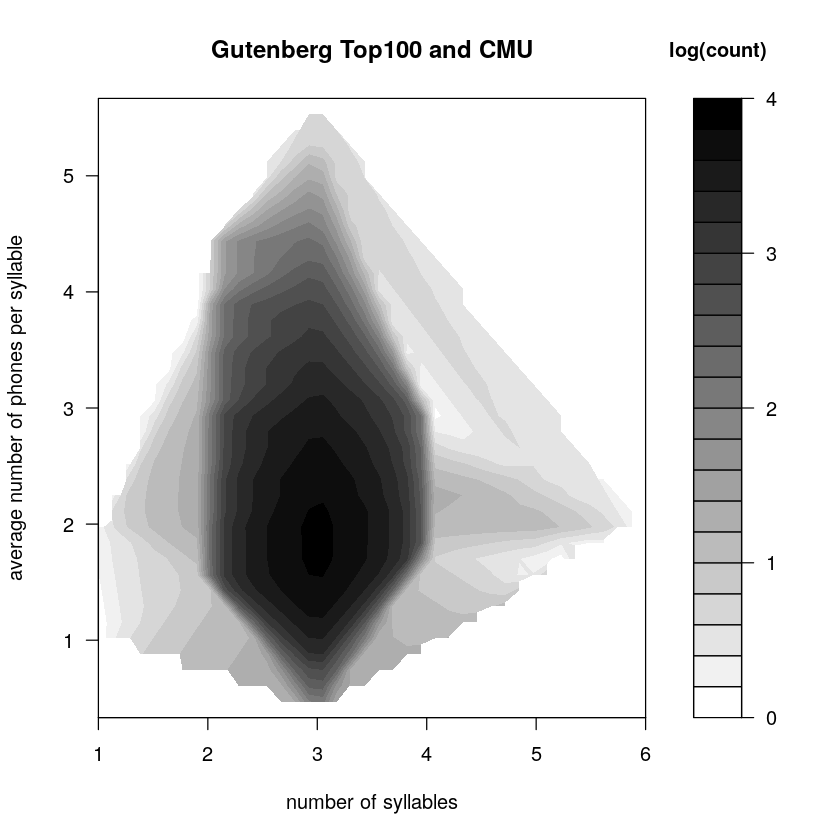

In [28]:
df <- read.table("/tmp/counts_cmugutenberg",header=TRUE)
library(akima)
fld <- with(df, interp(x = num_syllables, y = avg_phone_length, z = count))
filled.contour(x = fld$x,
               y = fld$y,
               z = log10(fld$z),
               color.palette =
                 colorRampPalette(c("white", "black")),
               xlab = "number of syllables",
               ylab = "average number of phones per syllable",
               main = "Gutenberg Top100 and CMU",
               key.title = title(main = "log(count)", cex.main = 1))
dev.copy(svg,"/tmp/counts_numsyl_cmugutenberg.svg")
dev.off()

In [29]:
cat /tmp/data_cmugutenberg | tail -n +2 | awk -F'\t' 'BEGIN{OFS=FS}{print $4,$5,$6}' | 
    awk 'BEGIN{OFS="\t"} {count[$1,$2]+=$3;} END{for (key in count) {split(key,a,SUBSEP); print count[a[1],a[2]], a[1], a[2]}}' | sort -rn > /tmp/freq_numsyl_avgphlen_cmugutenberg
sed -i '1ifreq_occ\tnum_syllables\tavg_phone_length' /tmp/freq_numsyl_avgphlen_cmugutenberg 
head /tmp/freq_numsyl_avgphlen_cmugutenberg

freq_occ	num_syllables	avg_phone_length
2626267	3	1
2617983	3	0.666667
1118522	3	1.33333
759152	3	1.66667
525501	3	2
359930	3	2.33333
211085	3	2.66667
127456	3	3
60016	3	3.33333


svg 
  3

png 
  2

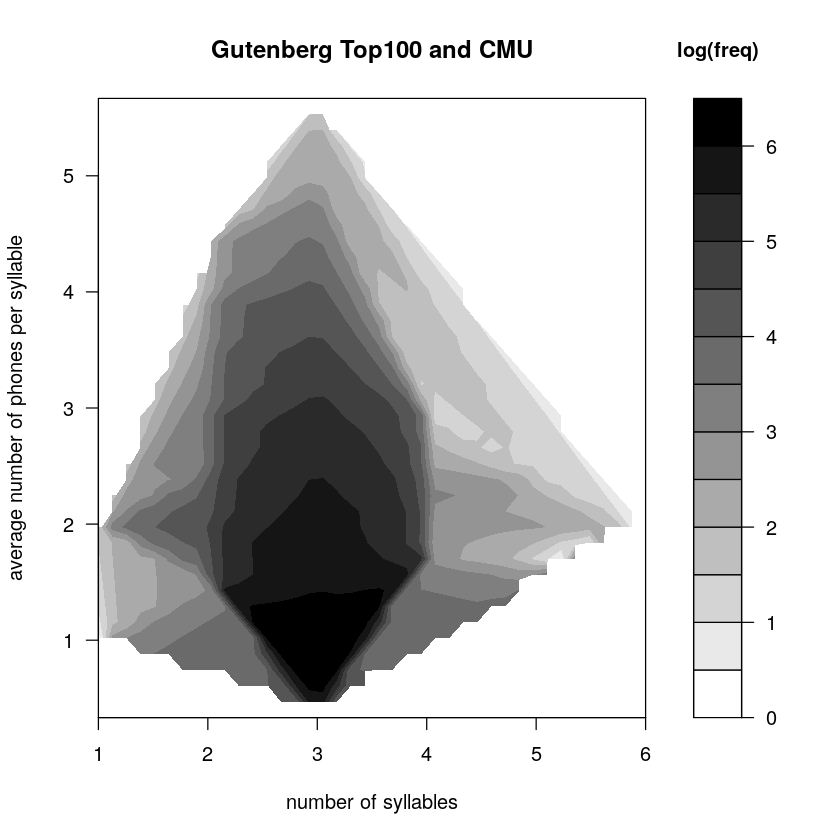

In [30]:
df <- read.table("/tmp/freq_numsyl_avgphlen_cmugutenberg",header=TRUE)
library(akima)
fld <- with(df, interp(x = num_syllables, y = avg_phone_length, z = freq_occ))
filled.contour(x = fld$x,
               y = fld$y,
               z = log10(fld$z),
               color.palette =
                 colorRampPalette(c("white", "black")),
               xlab = "number of syllables",
               ylab = "average number of phones per syllable",
               main = "Gutenberg Top100 and CMU",
               key.title = title(main = "log(freq)", cex.main = 1))
dev.copy(svg,"/tmp/freq_numsyl_avgphlen_cmugutenberg.svg")
dev.off()